In [37]:
import seaborn as sns
import matplotlib as plt

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


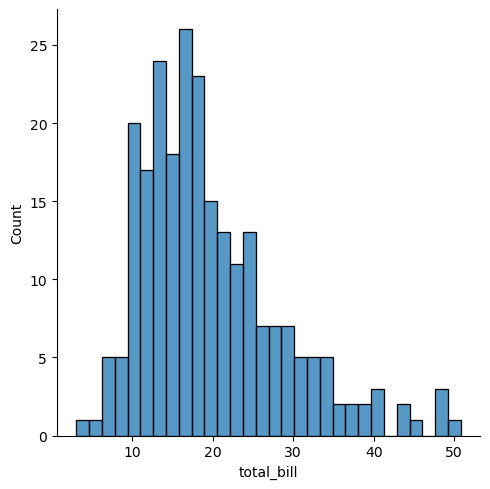

In [5]:
sns.displot(tips['total_bill'],bins=30)

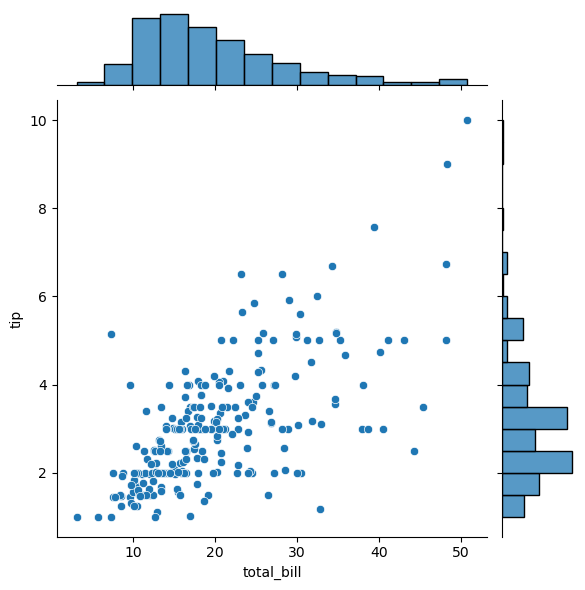

In [11]:
sns.jointplot(x='total_bill',y='tip',data=tips) #linear regre, ,kind = reg, hex, kde

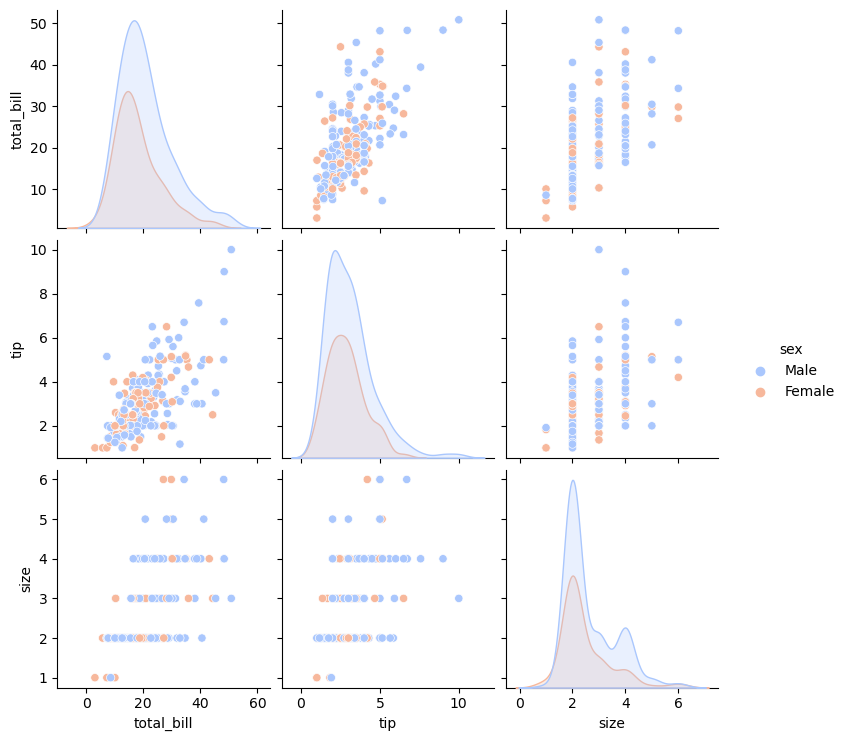

In [16]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

<AxesSubplot:xlabel='total_bill'>

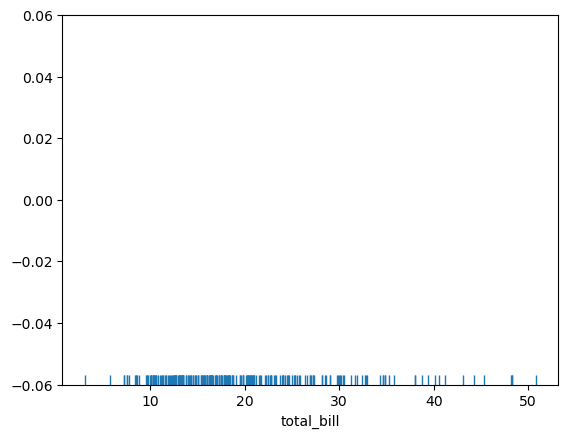

In [17]:
sns.rugplot(tips['total_bill'])

In [18]:
# KDE kernel destiation, , Gassuan sum, normal distrution, 

(0.0, 1.0)

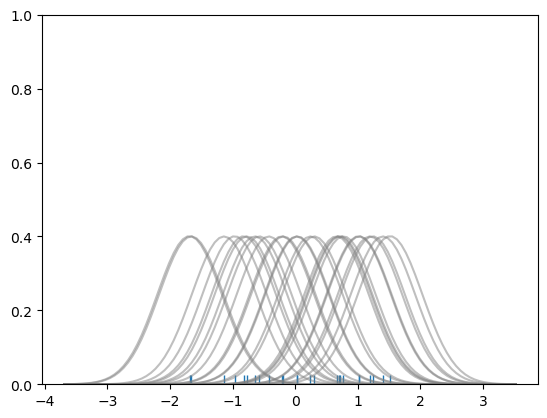

In [42]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

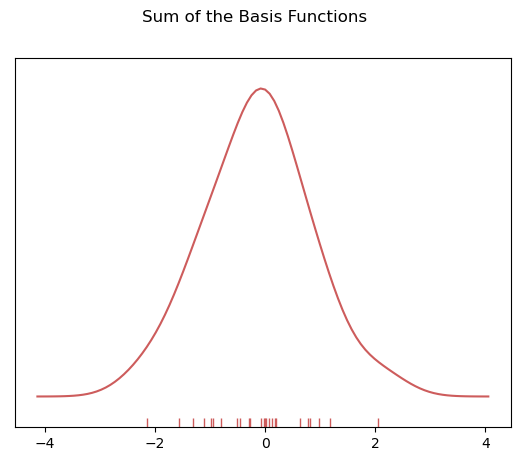

In [20]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

In [21]:
# Distributions: Distplot (histo), JointPlot (2 columsn), Pairplot (everything), Rugplot (logic KDE)

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

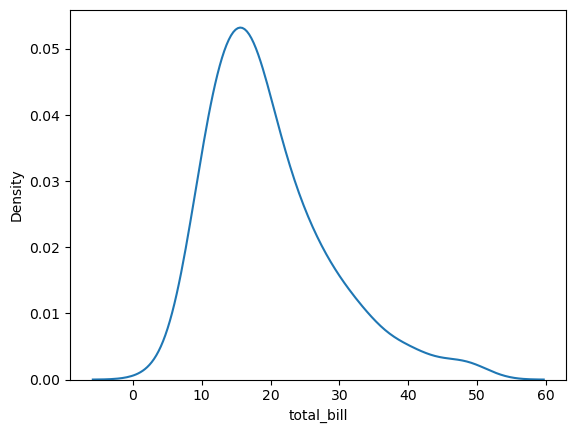

In [22]:
sns.kdeplot(tips['total_bill'])

In [12]:
import numpy as np

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

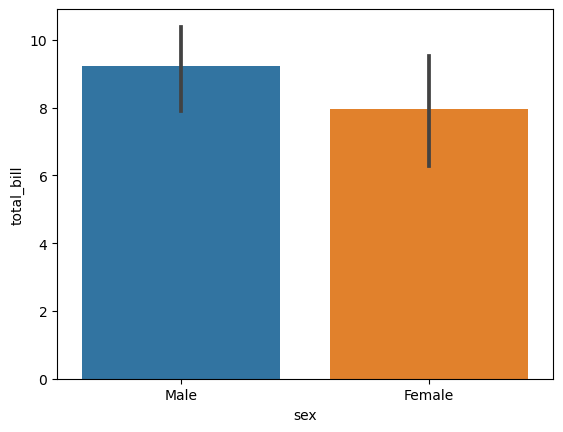

In [13]:
# Categorical Plots
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) #(mean)

<AxesSubplot:xlabel='sex', ylabel='count'>

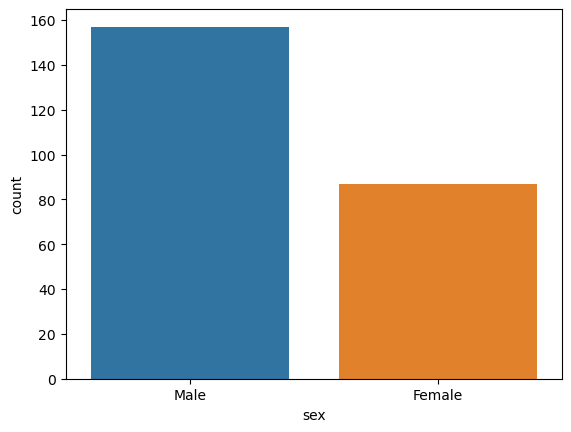

In [14]:
sns.countplot(x='sex',data=tips)  #panadas.count

<AxesSubplot:xlabel='day', ylabel='total_bill'>

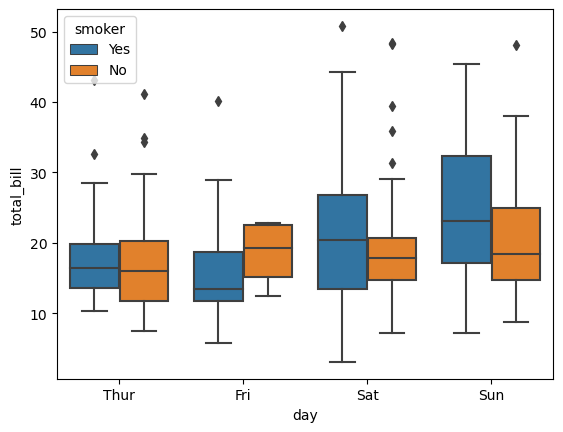

In [17]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='smoker')  # outliets, 25% 
# seaborn allows you to use hue, to quickly allow you to see new set of data 

<AxesSubplot:xlabel='day', ylabel='total_bill'>

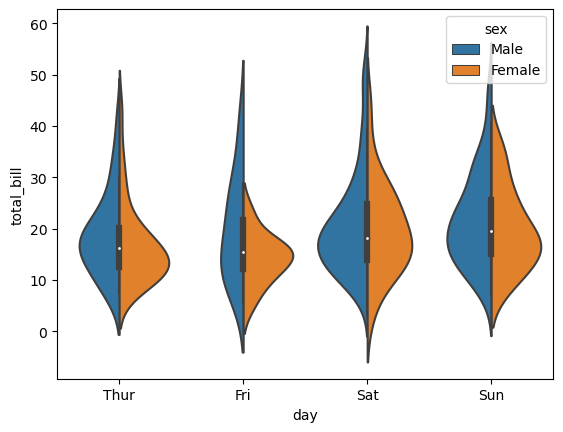

In [20]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True)
# know your audeince 
# Data Scientist 
# CEO, box plot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

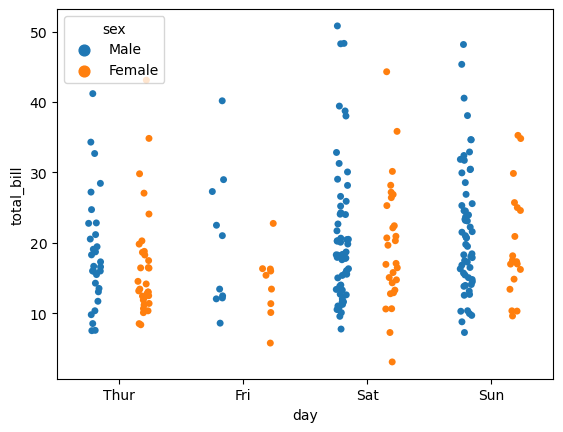

In [24]:
sns.stripplot(x='day',y='total_bill',data=tips, hue='sex', dodge = True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

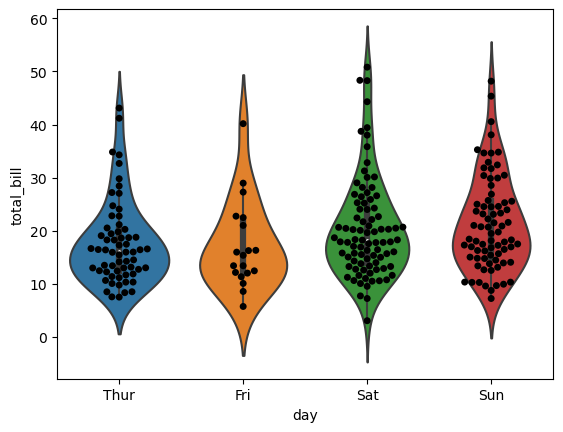

In [27]:

sns.violinplot(x='day',y='total_bill',data = tips)
sns.swarmplot(x='day',y='total_bill',data = tips,color='black')  #don't scale well with numbers, for large

In [8]:
# Matrix Plots

flights = sns.load_dataset('flights')

In [9]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [10]:
tips  # Matrix form, 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [13]:
tc = tips.corr()

<AxesSubplot:>

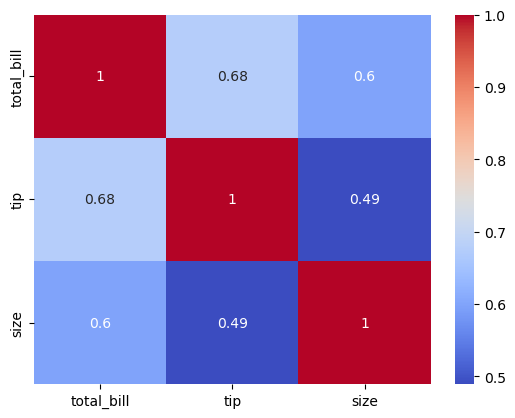

In [16]:
sns.heatmap(tc, annot = True, cmap = 'coolwarm')

In [17]:
flights # get into matrix form

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [21]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

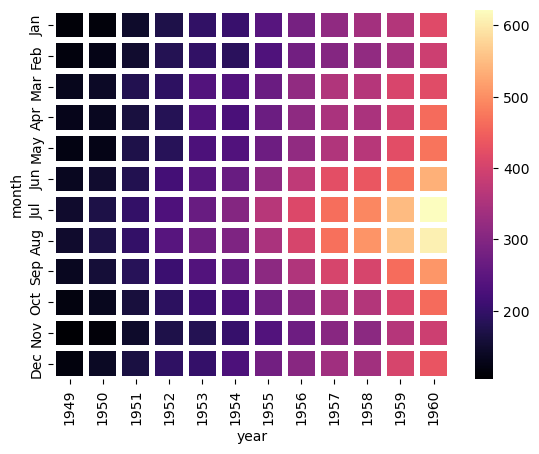

In [24]:
sns.heatmap(fp, cmap = 'magma', linecolor='white',linewidths=3)

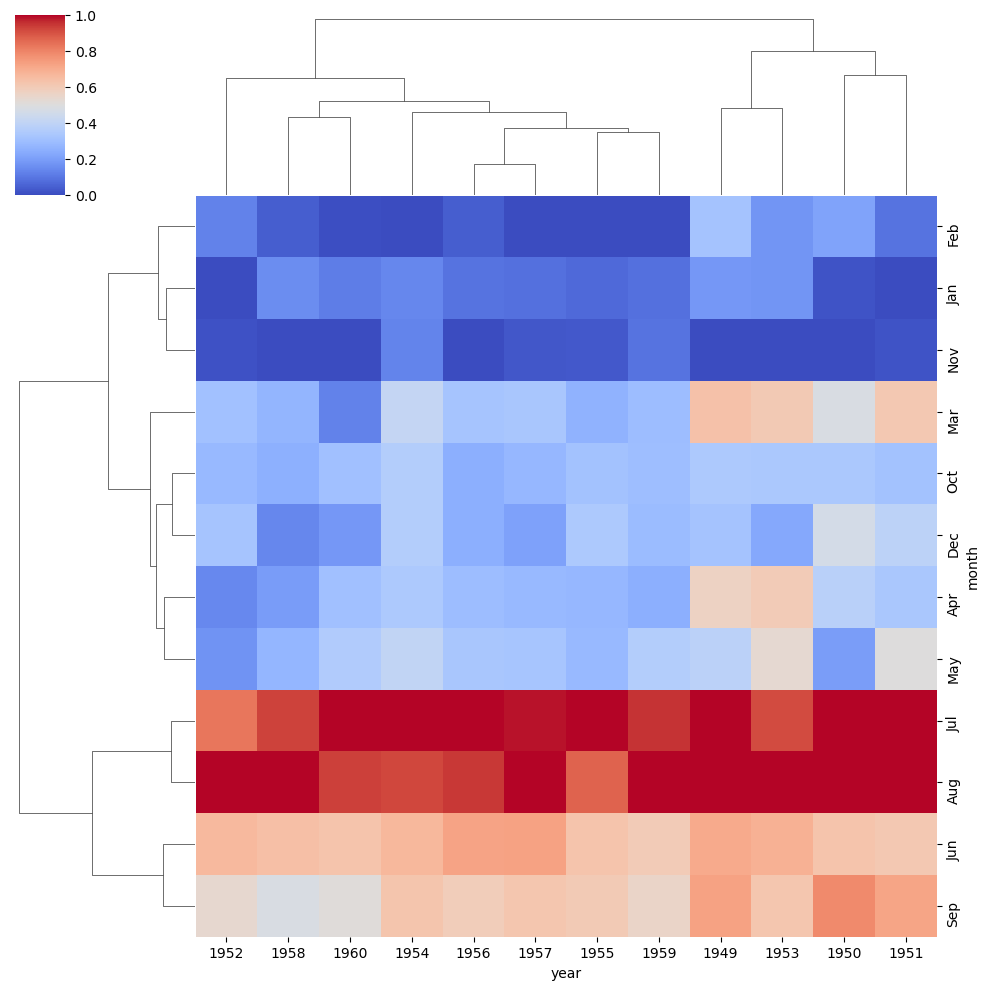

In [29]:
#clustermap(
sns.clustermap(fp,cmap='coolwarm',standard_scale=1)

In [31]:
# GRIDS
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/Users/josearnel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/josearnel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/josearnel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

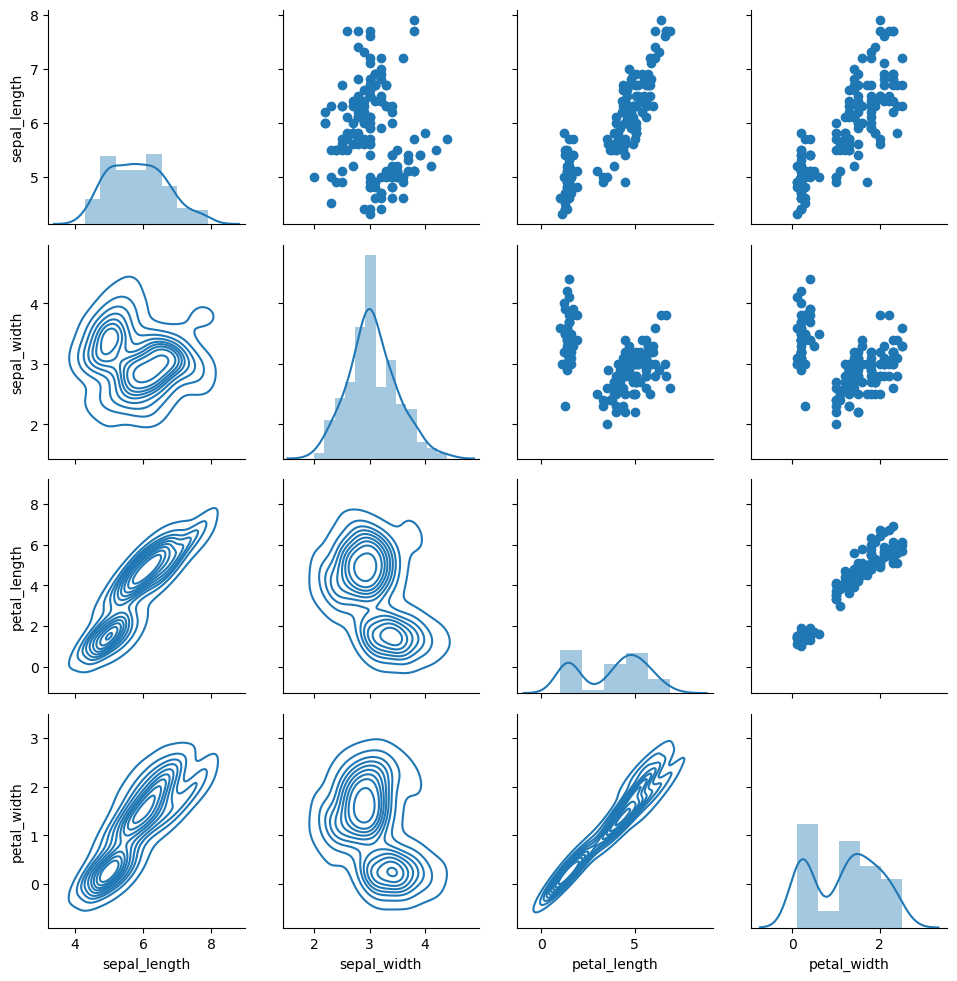

In [43]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


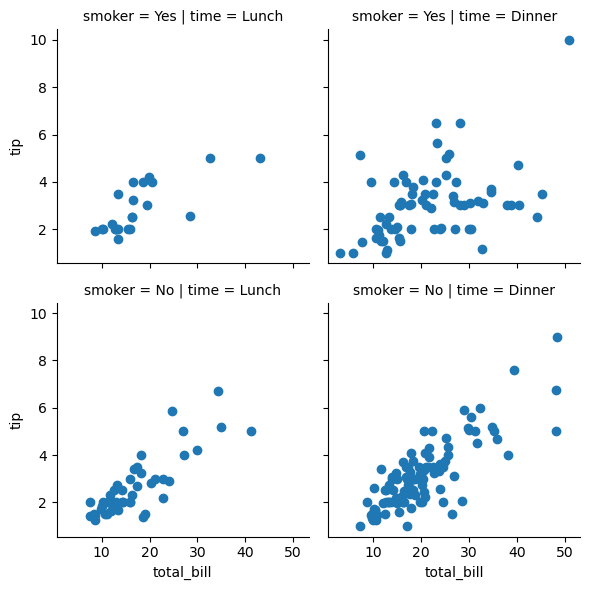

In [48]:
g = sns.FacetGrid(data=tips, col = 'time', row='smoker')
# g.map(sns.distplot, 'total_bill')
g.map(plt.scatter, 'total_bill', 'tip')

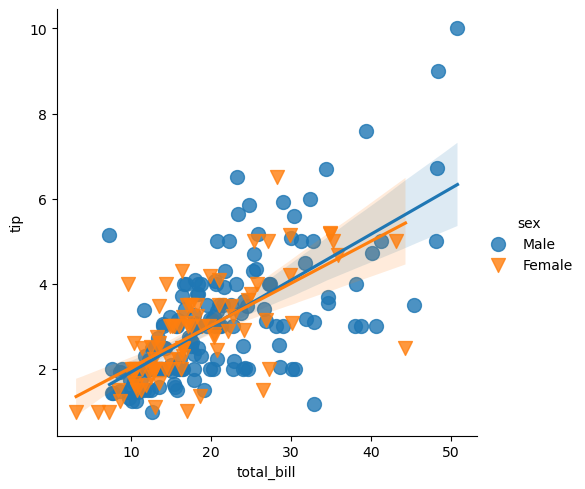

In [54]:
# REGRESSION PLOTS 
sns.lmplot(x='total_bill', y='tip',data =tips, hue = 'sex', markers =['o','v'],
          scatter_kws={'s':100})

In [ ]:
sns.lmplot(x='total_bill', y='tip',data =tips,c)